## TUTORIAL 4:
### AIMS: 
Simple Artificial neural network technique applied on classification of exoplanets using
programs by Data analyst Nagesh Singh Chauhan
Tasks:
• use the same reporistory as in Tutorial 3
• go to exoplanet_ANN.py and try to make ipynb of it, also take a look at article linked in repo
which may help; the aim is that you understand each line of the code, make printing of
intermediate results, and if unknown command is encountered than to go to the online sources
to understand its meaning
• could you make some innovations in the ipynb such us new functions, plots, import other data
etc...

In [21]:
import os
import warnings
import math
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from sklearn.metrics import mean_squared_error, mean_absolute_error
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split 
from sklearn import linear_model
from sklearn.metrics import recall_score, classification_report, precision_score, confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler, normalize
from scipy import ndimage
import seaborn as sns

from scikeras.wrappers import KerasClassifier

In [2]:
def reduce_memory(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

In [3]:
df = pd.read_csv('results.csv')
df = df.drop('Unnamed: 0', axis=1)

x = df[df.columns[df.columns != 'habitable']]
x = x.drop(['lon','lat', 'angsep', 'maxangsep', 'hz_in', 'hz_out', 'hz_center', 'snr_1h', 'baseline', 'detected', 'snr_current','id', 'int_time', 't_slew', 'ra', 'dec'], axis=1)

y = pd.DataFrame(df['habitable'])

In [4]:
x, y = reduce_memory(x), reduce_memory(y)

Memory usage of dataframe is 2.99 MB
Memory usage after optimization is: 0.71 MB
Decreased by 76.3%
Memory usage of dataframe is 0.11 MB
Memory usage after optimization is: 0.01 MB
Decreased by 87.4%


In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [25]:
#Feature scaling
std_scaler = MinMaxScaler()
x_train = scaled = std_scaler.fit_transform(x_train)
x_test = std_scaler.fit_transform(x_test)

In [26]:
sm = SMOTE(random_state=27)#, ratio = 1.0)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train) 

In [27]:
#Artificial Neural Network
import tensorflow
tensorflow.random.set_seed(101)
from sklearn.model_selection import cross_val_score
#from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library
from keras import optimizers
def build_classifier():
#     optimizer = optimizers.Adam(clipvalue=0.5)
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train_res.shape[1]))
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [28]:
classifier = KerasClassifier(build_fn = build_classifier, epochs = 40)
# accuracies = cross_val_score(estimator = classifier, X = x_train_res, y = y_train_res, cv = 5, n_jobs = -1)
# mean = accuracies.mean()
# variance = accuracies.std()

In [29]:
# print("Accuracy mean: "+ str(mean))
# print("Accuracy variance: "+ str(variance))

In [30]:
classifier.fit(x_train_res,y_train_res);

Epoch 1/40
501/501 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5167 - loss: 0.6890
Epoch 2/40
501/501 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8780 - loss: 0.4628
Epoch 3/40
501/501 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9429 - loss: 0.1902
Epoch 4/40
501/501 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9503 - loss: 0.1338
Epoch 5/40
501/501 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9554 - loss: 0.1171
Epoch 6/40
501/501 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9579 - loss: 0.1084
Epoch 7/40
501/501 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9595 - loss: 0.1024
Epoch 8/40
501/501 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9614 - loss: 0.0977
Epoch 9/40
501/501 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9626 - loss: 0.0938
Epoch 10/40
501/501 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9647 - loss: 0.0902
Epoch 11/40
501/501 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9658 - loss: 0.0870
Epoch 12/40
501/501 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

In [31]:
y_pred = classifier.predict(x_test)
accuracy_score(y_test,y_pred)*100

145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


97.7498918217222

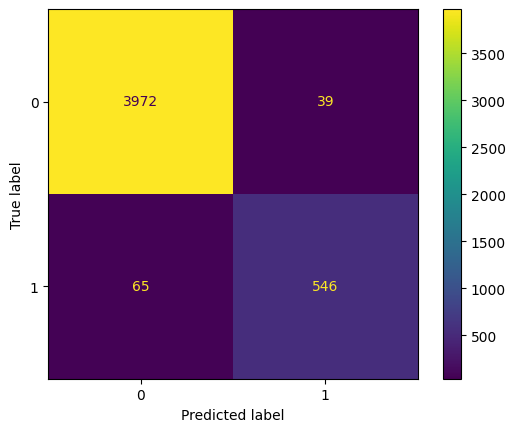

In [32]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

cm = confusion_matrix(y_test, y_pred)
cm = ConfusionMatrixDisplay(confusion_matrix=cm)
cm.plot()